## Exercise 1: Clustering

### 2.1. Analyser les données du Dataset  CustomerDataSet.xls

#### 2.1.1 Charger les données du dataset CustomerDataSet.xls.
Importer le package pandas package puis utiliser la fonction ```read_excel()``` pour charger le fichier.

In [2]:
import pandas as pd
df=pd.read_excel("C:\\Users\\aitma\\Desktop\\Travail à rendre\\CustomerDataSet.xls")
df.head()


,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435


#### 2.1.2 Ségmenter le fichier en utilisant KMeans. 

2.1.2.1. Utiliser plusieurs valeurs pour k. Quelles la meilleure valeur de k? 

2.1.2.2. Que vous dit le clustering concernant le portefeuille de produits? 

2.1.2.3. Que vous dit le regroupement concernant vos efforts de marketing dans différentes régions (zipcode)?
- Pour répondre à ces questions, vous devez suivre les étapes suivantes :

In [3]:
#import KMeans
from sklearn.cluster import KMeans
#import matplotlib
import matplotlib.pyplot as plt
#import preprocessing
from sklearn import preprocessing
#creer un standardscaler
scaler = preprocessing.MinMaxScaler()
data=pd.read_excel("C:\\Users\\aitma\\Desktop\\Travail à rendre\\CustomerDataSet.xls")
data

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,4,45,10,2,1365
1,5,42,18,5,2764
2,6,50,0,1,1343
3,8,13,12,4,2435
4,9,10,7,3,2435
5,10,34,17,6,2896
6,11,40,20,8,2869
7,12,40,8,2,1236
8,14,9,9,8,2435
9,15,36,7,2,1764


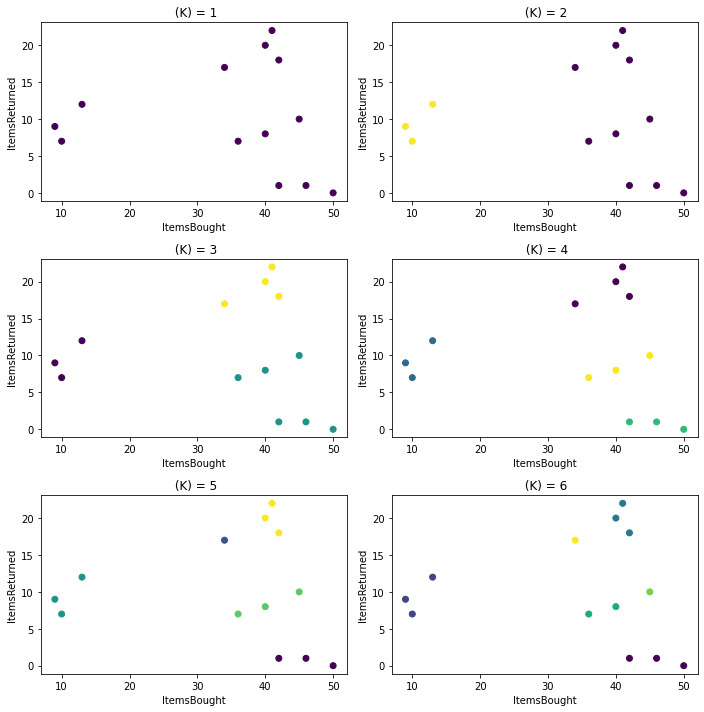

In [4]:
plt.figure(figsize=(10,10))
for i in range(1,7):
    # Créer une instance de KMeans
    estimator = KMeans(n_clusters = i)
    #  Créer un regroupement pour chaque valeur k
    labels = estimator.fit_predict(data[['ItemsBought', 'ItemsReturned']])
    plt.subplot(3,2,i)
    plt.tight_layout()
    
    plt.title(" (K) = {}".format(i))
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    plt.scatter(data['ItemsBought'], data['ItemsReturned'], c=estimator.labels_)
plt.show()

<text>à votre avis, quelle est la meilleure valeur de k?

Réponse: la meilleure valeur de k est 4 car en cette partie on voit que les point sont bien divisés sans bruit remarquable. </text>

#####  2.1.2.3 Que vous dit le clustering concernant votre portefeuille de produits?


Exécutez à nouveau le clustering avec ```K=3```. Ajoutez les identifiants des produits au tracé à l'aide de la fonction ```annotate()``` et interprétez les résultats.

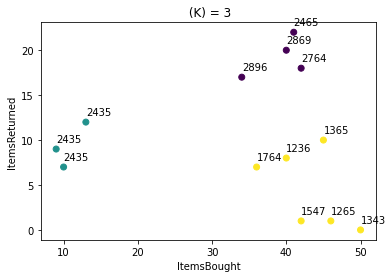

In [5]:
estimator = KMeans(n_clusters = 3)
    #  Créer un regroupement pour chaque valeur k
labels = estimator.fit_predict(data[['ItemsBought', 'ItemsReturned']])
# plt.subplot(3,3,1)
#     plt.tight_layout()
    
plt.title(" (K) = {}".format(3))
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.scatter(data['ItemsBought'], data['ItemsReturned'], c=estimator.labels_)
    
for i in range(len(data)):
    plt.annotate(data["Product"][i],(data["ItemsBought"][i],data["ItemsReturned"][i]+0.8))
plt.show()

    

<text> interprétation :</text>

<text> à travers le graphe on remarque que les produits ID 1547,1265,1343 ne sont pas retournés alors que le Produits ID 2435 est plus retourné </text>

#####  2.1.2.4 Que vous dit le clustering concernant vos efforts de marketing dans différentes régions?

Pour répondre à cette question, réafficher le clustering, mais cette fois en utilisant l'attribut zipcode à l'aide de la fonction ```annotate()```.
Noter que vous pouvez afficher le graphique en utilisant les données originales.

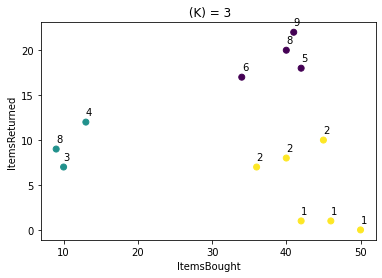

In [6]:
plt.title(" (K) = {}".format(3))
plt.xlabel('ItemsBought')
plt.ylabel('ItemsReturned')
plt.scatter(data['ItemsBought'], data['ItemsReturned'], c=estimator.labels_)
    
for i in range(len(data)):
    plt.annotate(data["ZipCode"][i],(data["ItemsBought"][i],data["ItemsReturned"][i]+0.8))
plt.show()

<text> à travers le clustring il n'y a pas un bon marketing dans les zones de ZipCode 8,4,3 </text>

#### 2.1.3 Regroupez le meme dataset à l'aide du clustering hiérarchique agglomératif. Que vous dit le dendrogramme concernant vos groupes de clients?

Pour afficher le dendrogramme, utiliser la fonction ```linkage()``` de scipy.
Après la création du clustering avec la fonction ```linkage()``` , on peut afficher le résultat avec la fonction ```dendrogram()``` 

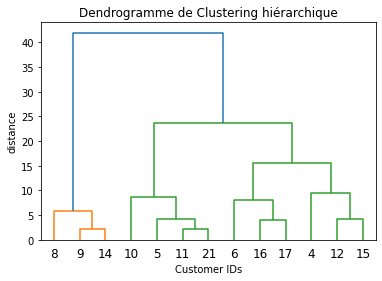

In [7]:
# importer le dendogramme et linkage à partir de scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data[['ItemsBought', 'ItemsReturned']], 'complete')

plt.title('Dendrogramme de Clustering hiérarchique')

plt.xlabel('Customer IDs')
plt.ylabel('distance')

dendrogram(Z, labels=list(data['Customer ID']))

plt.show()

#### 2.1.4 Découper le clustering hiérarchique afin d'obtenir 3 ou 4 groupes de clients. Nommez ces groupes avec des étiquettes appropriées.

Pour créer un clustering partitionnel à partir d'un clustering hiérarchique, il faut couper la hiérarchie.
Utiliser le paramètre  ```truncate_mode``` de lafonction ```dendrogram()```.
Pour avoir les IDs des clusters comme KMeans, utiliser la fonction [ la fonction ```fcluster()```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html).

[3 2 3 1 1 2 2 3 1 3 3 3 2]
[4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 21] 

[4 2 3 1 1 2 2 4 1 4 3 3 2]
[4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17, 21] 



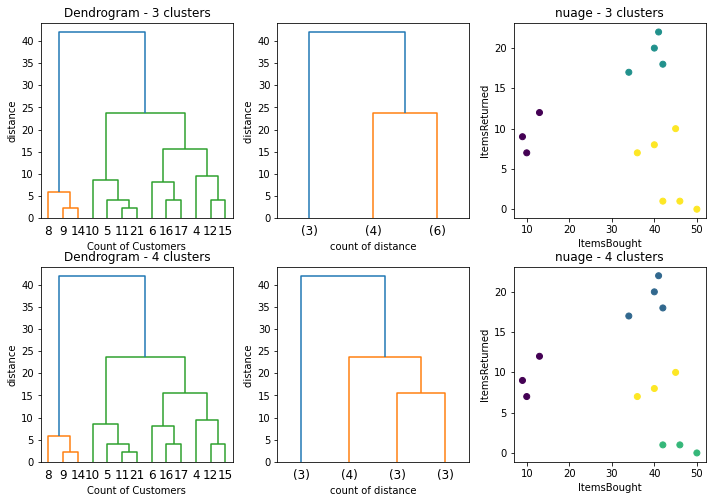

In [8]:
from scipy.cluster.hierarchy import fcluster
# Créer la figure
plt.figure(figsize=(10,10))

# boucler sur les différents k (ici: 3 et 4)
counter = 1
for i in [3,4]:
    # ajouter un sous-graphe
    plt.subplot(3,3,counter)
    counter += 1
    
    # Lesétiquettes du graphe
    plt.tight_layout()
    plt.title('Dendrogram - {} clusters'.format(i))
    plt.xlabel('Count of Customers')
    plt.ylabel('distance')
    # Afficher le dendogramme
    dendrogram(Z, labels=list(data['Customer ID']))
        
    
    
    # ajouter le deuxième graphique
    plt.subplot(3,3,counter)
    counter += 1
    
    # Découper le dendogramme pour avoir les clusters
    dendrogram(Z, truncate_mode='lastp', p=i)
    # pour combiner ID de chaque client avec le nombre de cluster auquel il appartient
    
    print(fcluster(Z,t=i,criterion="maxclust"))
    liste=data["Customer ID"].sort_values().tolist()
    print(liste,"\n")
    # les étiquettes des axes
    plt.xlabel('count of distance')
    plt.ylabel('distance ')
    # Créer un nuage de points (scatter) en utilisant des couleurs différentes pour les clusters
    plt.subplot(3,3,counter)
    counter +=1
    plt.scatter(data['ItemsBought'], data['ItemsReturned'] , c=fcluster(Z,t=i,criterion="maxclust"))
    plt.title('nuage - {} clusters'.format(i))
    # les étiquettes des axes
    plt.xlabel('ItemsBought')
    plt.ylabel('ItemsReturned')
    
# afficher la figure
plt.show()


 <text> à travers ce clustring on voit que les clients sont divisés en 3 classe : les clients jaunes qui achetent un nombre de produits plus supérieur que le nombre des retournés, les clients en violet qui achetent le méme nombre des produits retournés par eux , les clients en bleu qui achetent le double du nombre des produits qui ils retournent     </text>

### 2.2. Analyser le deuxième Dataset (StudentData.xls)

#### 2.2.1. Agréger (Regrouper) les données des élèves par élève et calculer la note moyenne et le nombre moyen de cours suivis.

(Pour chaque élève)

In [9]:

# Charger le fichier excel dans une DataFrame
df=pd.read_excel("C:\\Users\\aitma\\Desktop\\Travail à rendre\\StudentData.xls")

# Afficher les premiers exemples
df.tail()

# Grouper les données par élève et calculer la note moyenne 
data_frame1=df.groupby(["Name"])["Mark"].mean()
data_frame2=df.groupby(["Name"])["Attended"].mean()
print(data_frame1,"\n\n",data_frame2)
# Afficher les premiers exemples

Name
Alex Krausche      1.325000
Avid Morvita       3.100000
Frank Fester       2.200000
Mariano Selina     1.680000
Michaela Martke    3.660000
Otto Blacher       2.260000
Steve Queck        2.800000
Susanne Müller     2.433333
Tanja Becker       1.666667
Ulrich Gester      4.400000
Name: Mark, dtype: float64 

 Name
Alex Krausche      12.500000
Avid Morvita       11.333333
Frank Fester       11.600000
Mariano Selina      6.200000
Michaela Martke     7.400000
Otto Blacher       11.800000
Steve Queck         8.333333
Susanne Müller     12.000000
Tanja Becker       12.000000
Ulrich Gester       8.600000
Name: Attended, dtype: float64


#### 2.2.2 Regroupez l'ensemble de données à l'aide de l'algorithme K-Means. Un attribut domine-t-il le clustering ? Que pouvez-vous faire à ce sujet ? Attribuez des étiquettes appropriées à vos clusters.




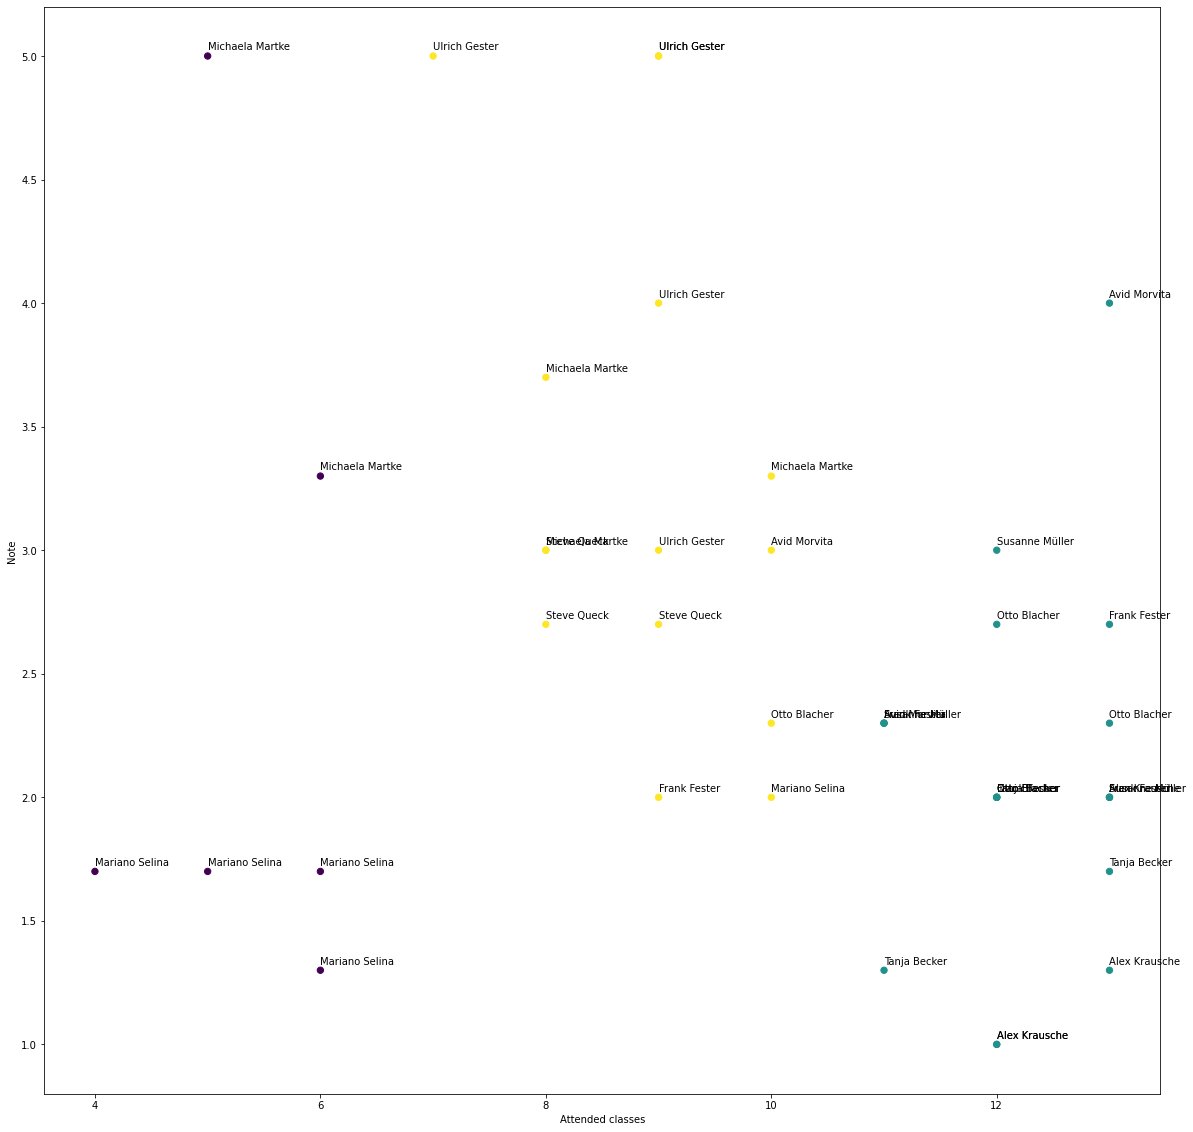

In [10]:
import numpy as np

plt.figure(figsize=(20,20))
# Créer une instance de Kmeans
estimator = KMeans(n_clusters = 3)
#  Créer un regroupement pour chaque valeur k
labels = estimator.fit_predict(df[["Attended", "Mark"]])


# Créer le nuage des points
plt.scatter(df['Attended'], df['Mark'], c=estimator.labels_,s=40)
   


plt.xlabel("Attended classes")
plt.ylabel("Note")

# Annoter chaque point par le nom de l'élève
dat=df["Name"].unique()
# data_frame["Name"]=data_frame["Name"].astype('string')
for i in range(len(df)):
    plt.annotate(df["Name"][i],(df["Attended"][i],df["Mark"][i]+0.025))

# Afficher la figure\
plt.show()

<text> on voit dans les nuage des points que l'attribut "Attended classes" domine le clustring alors alors pour traiter ce probléme on va appliquer la normalisation et la standardisation sur cet attribut </text>

#### 2.2.3. Créer un regrpoupement  à l'aide du clustering hiérarchique agglomératif. Expérimentez avec différentes métriques de liaison. Quel est le bon réglage?

Vous définissez d'abord les paramètres que vous voulez tester (les différentes métriques de liaison), puis parcourez ces valeurs dans une boucle for.
À l'intérieur de la boucle, vous créez le regroupement et tracez le dendrogramme.

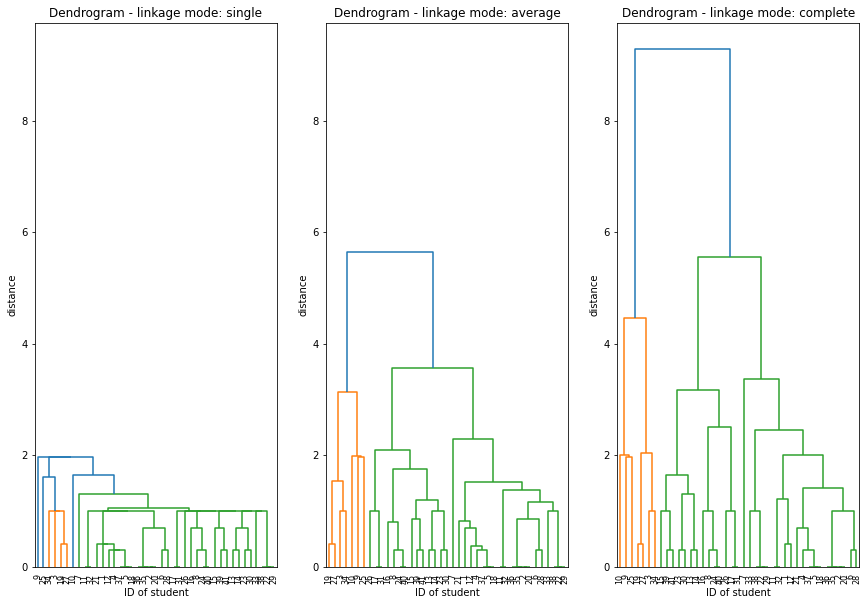

In [11]:

# définir la liste des métriques de laison
métriques = ['single', 'average', 'complete']
ID_column=[]
for i in range(1,len(df)+1):
               ID_column.append(i)
               
df["ID_Student"]=ID_column
   

# créer une figure
plt.figure(figsize=(20,10))
y_axis = None

# boucler sur les différentes métriques
for i, métrique in enumerate(métriques):
    
    # ajouter un sous-graphe

    y_axis = plt.subplot(1,4,i + 1, sharey = y_axis)
    
    # Attribuer les étiquettes de
    plt.title('Dendrogram - linkage mode: {}'.format(métrique))
    plt.xlabel('ID of student')
    plt.ylabel('distance')
    
    # Créer le regroupemnt


    Z = linkage(df[['Attended', 'Mark']], métrique)
    
    # Afficher le dendogramme
    dendrogram(Z, labels=list(df['ID_Student']))
    
    
# Afficher la figure
plt.show()




<text>on voit que les distances entre les différents groupes dans le dendrogram de linkage complete sont peu prés haute et convenable pour choisir n'importe quel nombre de clusters alors que dans les autres dendrograms les distances sont trés bas et les clusters sont condensés</text>

### 2.4. Clustering du Dataset Geo Data 

#### 2.4.1. Le jeu de données géographiques contient les coordonnées (x & y) des logements dans une certaine zone. Examinez les données et visualisez-les avec un nuage de points, en utilisant la fonction ```area``` comme couleur.

In [12]:
import pandas as pd
#j'ai transformé le fichier geo.xlsx à geo.xls en ligne 
excel_data = pd.read_excel('C:\\Users\\aitma\\Desktop\\Travail à rendre\\geo.xls')
excel_data.head()


,id,x,y,area
0,1,1,1,1
1,2,2,1,1
2,3,3,1,1
3,4,4,1,1
4,5,5,1,1


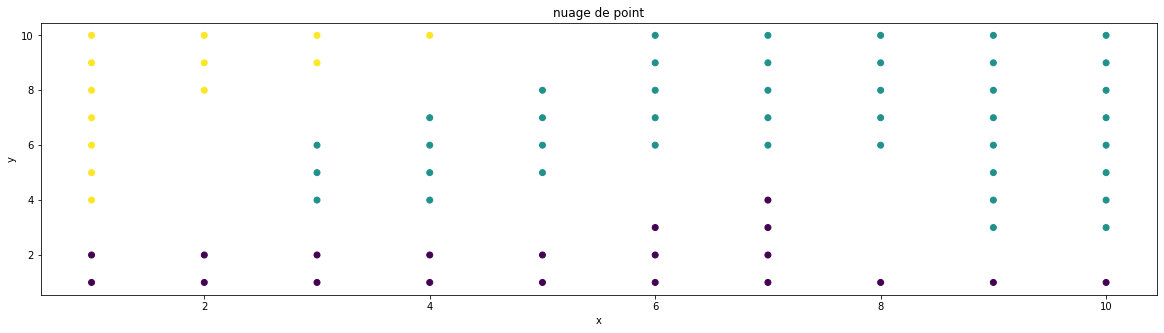

In [17]:
plt.figure(figsize=(20,5))
plt.title('nuage de point')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(excel_data['x'], excel_data['y'], c=excel_data["area"])

#### 2.4.2. Créer un regroupement en utilisant k-Means (k=3). Les clusters représentent-ils les zones d'origine?
Regroupez l'ensemble de données et traçez à nouveau, cette fois en utilisant les identifiants de cluster comme couleur.

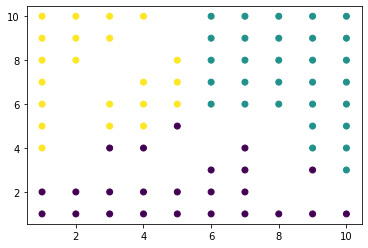

In [19]:
# Créer une instance de Kmeans
estimator = KMeans(n_clusters = 3)
# Créer le regroupement

labels = estimator.fit_predict(excel_data[["x", "y"]])


# Créer le nuage des points
plt.scatter(excel_data['x'], excel_data['y'], c=estimator.labels_)





<text>en général les clusters représentent les zones d'origine il y'a juste un changement dans quelque points </text>

#### 2.4.3. Appliquez DBSCAN en utilisant différentes valeurs du paramètre epsilon. Pouvez-vous reproduire les zones d'origine à l'aide de cet algorithme ?

Executez d'abord DBSCAN avec les paramètres par défaut.
Ensuite, testez différents paramétrages pour ```min_samples``` et ```eps```.

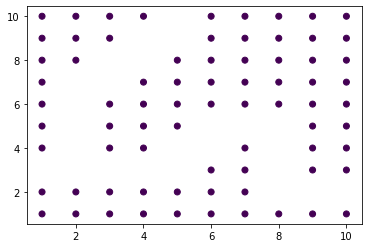

In [62]:
# Affichage du résultat de DBSCAN avec les paramètres par défaut
from sklearn.cluster import DBSCAN
#min_samples=5, eps=0.5, metric='euclidean'
clusterer = DBSCAN()


# créer les clusters
clusters = clusterer.fit(excel_data[['x', 'y']])

# créer plot
plt.scatter(excel_data['x'], excel_data['y'], c=clusters.labels_)

# afficher plot
plt.show()

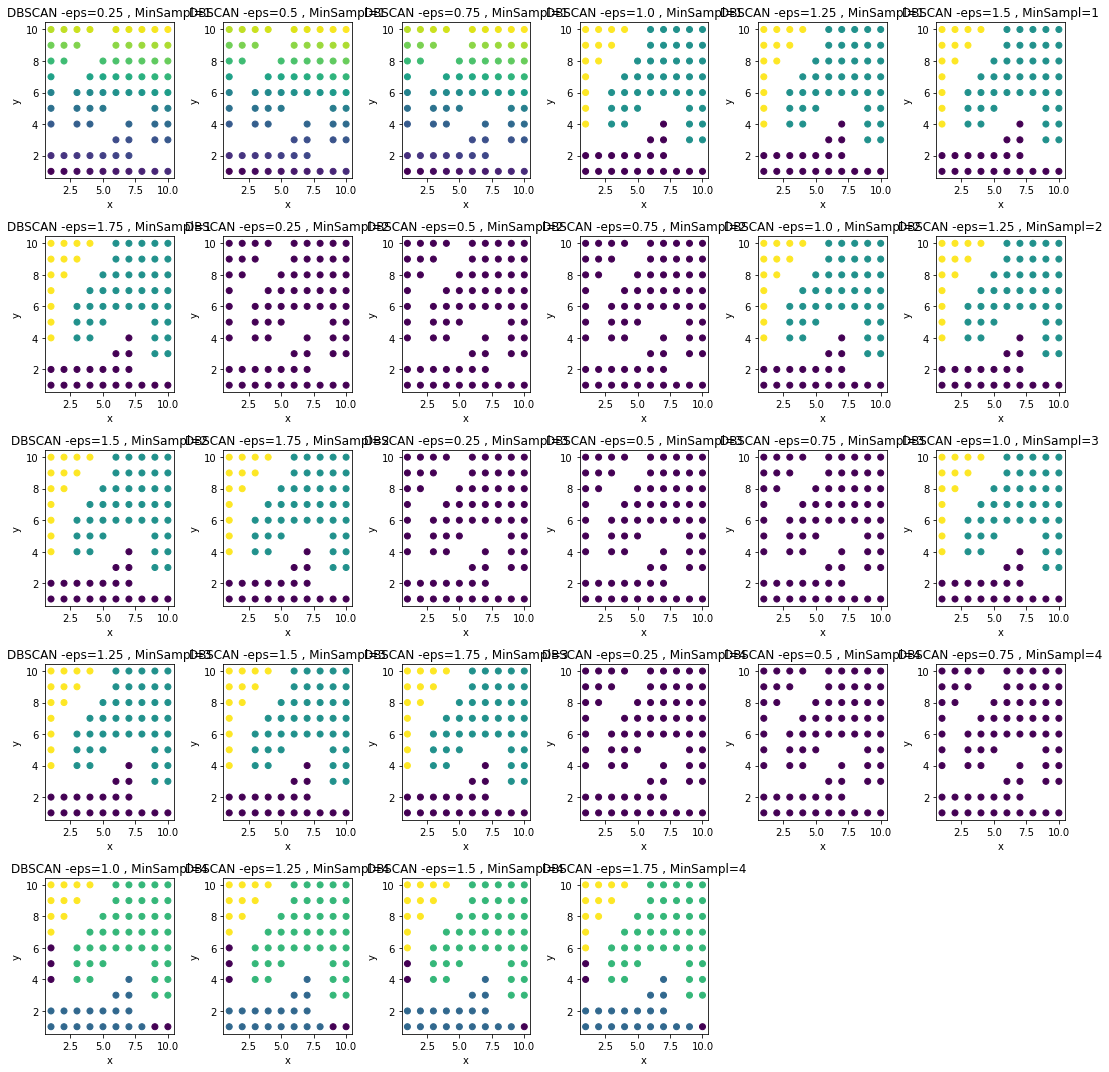

In [64]:
import numpy as np
# le teste sur différents paramètres et affichage des résulats
plt.figure(figsize=(15,15))

# boucler sur les différents k (ici: 3 et 4)
counter = 1
for i in range(1,5):
    for a in np.arange(0.25, 2, 0.25):
        # ajouter un sous-graphe
        plt.subplot(5,6,counter)
        counter += 1
        clusterer = DBSCAN(min_samples=i, eps=a, metric='euclidean')

# créer les clusters
        clusters = clusterer.fit(excel_data[['x', 'y']])
        # créer plot
        plt.scatter(excel_data['x'], excel_data['y'], c=clusters.labels_)
    # Lesétiquettes du graphe
        plt.tight_layout()
        plt.title('DBSCAN -eps={} , MinSampl={}'.format(a,i))
        plt.xlabel('x')
        plt.ylabel('y')
plt.show()        

<text>l'algorithme de DBSCAN nous permet de reproduire les zones d'origine mais si on a choisi epsilon supérieur au égale 1 car déja la distance entre chaque deux points est 1 </text>